<a href="https://colab.research.google.com/github/npace828/Titanic_RandomForest/blob/main/titanic_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.7247191011235955


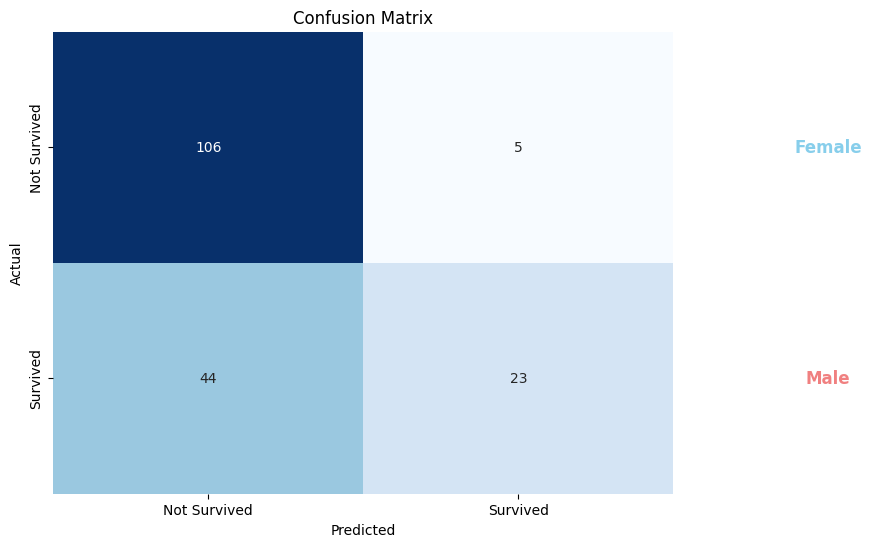

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
titanic_data = pd.read_csv("titanic.csv")

# Preprocessing
# Drop irrelevant columns and handle missing values
titanic_data.drop(columns=["Name", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"], inplace=True)
titanic_data["Pclass"] = titanic_data["Pclass"].astype(str)  # Convert Pclass to string for one-hot encoding

# One-hot encoding for Pclass and Sex
titanic_data = pd.get_dummies(titanic_data, columns=["Pclass", "Sex"], drop_first=True)

# Split data into features and target variable
X = titanic_data.drop(columns=["Survived"])
y = titanic_data["Survived"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with legend
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Survived', 'Survived'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Survived', 'Survived'])

# Add legend
legend_labels = ['Female', 'Male']
colors = ['skyblue', 'lightcoral']
for i, label in enumerate(legend_labels):
    plt.text(2.5, i + 0.5, label, ha='center', va='center', color=colors[i], fontsize=12, fontweight='bold')

plt.show()



